## CUSTOMER SEGMENTATION

The demand for online purchase has exponentially increased with the evolution of mobiles and the shift from calling to browsing. This market has proven to have a global reach than being confined to a physical location and demand for its customers physical presence.

An online retail company, a non-store-based venture, has been logging its sales and customer details. A few of the e-visitors either do not complete their shopping or products have been returned with many comments. This leads for the need of business solution by the company to prevent its losses and increase the revenue. 

### Feature information:
1. InvoiceNo- Invoice printed has unique id
2. StockCode - Products are segemented with unique code
3. Description - Product description.
4. Quantity - Number of products purchased
5. InvoiceDate - The day product was purchased written in invoice.
6. UnitPrice - The price of 1 prduct
7. CustomerID - Unique ID given to customer by the company
8. Country - Country from which purchase is made

## Problem Statement:-

### Customer Segmentation based on revenue made and retention factor using clustering. 

The company has a huge pool of customers that vary diversely in terms of location, frequency of purchase and product purchased. Therefore, a common marketing strategy to encapsulate all would not work. How do we group the customers into categories such that different groups can be targeted appropriately and enable more focussed strategies to be applied?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage , dendrogram , cophenet
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_csv('Online_Retail_Service.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


# EDA

In [3]:
df.shape

(532619, 8)

* -- 532619 rows 
* -- 8 Columns

In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
#Converting the Invoice Date into datetime format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst=True)

#Removing the time from the Invoice Date feature

df['InvoiceDate'] = [d.date() for d in df['InvoiceDate']]

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst=True)

#### Inference:
    
* Converted Invoice date to Datetime data type.
* Extracted only date from Invoice Date.
* All the data types are inline with data description.

# Missing Values

In [8]:
missing_values = pd.DataFrame({'Count':df.isnull().sum(),'Percentage':df.isnull().sum()/len(df)*100})
missing_values

,Count,Percentage
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.272991
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,134695,25.289184
Country,0,0.000000


In [9]:
df=df.dropna(axis=0)
df.shape

(397924, 8)

#### Inference

* Description has 0.27% of missing data which can be consider as negligible.
* CustomerID has 25% of missing data as we are dealing with segmenting the customers , customerID is one of the key feature 
 imputing such key feature with mode can mislead the result.
* Hence dropping all the Null values

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [11]:
df[df['UnitPrice']==0].count()[0]

40

In [12]:
df= df[df['UnitPrice']!=0]
df.shape

(397884, 8)

In [13]:
df[df['UnitPrice']==0].count()[0]

0

In [14]:
df['Quantity'][df['Quantity']<0] #Checking for -ve Quantity

Series([], Name: Quantity, dtype: int64)

#### Droping Invalid StockCodes

In [15]:
rmv = ['POST','M','DOT','B','S','AMAZONFEE','BANK CHARGES','gift_0001_10','gift_0001_20','gift_0001_30','gift_0001_40','gift_0001_50']
for i in rmv:
    df.drop(df[df['StockCode']==i].index, inplace=True)

In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


#### Inference:

* Observed some Unit Price entries as 0 which cannot be hence dropped such entries.

# Feature Extraction

In [17]:
df['Revenue']= df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


#### Inference:

* Extracting new feature Revenue by multiplying the Quantity and Unit price.

### Revenue Generated by each customer

In [18]:
revenue = df['Revenue'].groupby(df['CustomerID']).sum().reset_index()
revenue

,CustomerID,Revenue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1437.24
3,12349.0,1457.55
4,12350.0,294.40
...,...,...
4329,18280.0,180.60
4330,18281.0,80.82
4331,18282.0,178.05
4332,18283.0,2088.93


In [19]:
revenue_data = revenue.sort_values(by=['Revenue'],ascending=False)
revenue_data.head(10)

,CustomerID,Revenue
1689,14646.0,279138.02
4197,18102.0,259657.30
3725,17450.0,194550.79
3006,16446.0,168472.50
1879,14911.0,140450.72
55,12415.0,124564.53
1333,14156.0,117379.63
3768,17511.0,91062.38
0,12346.0,77183.60
2700,16029.0,72882.09


In [20]:
rv = revenue_data.head(10)

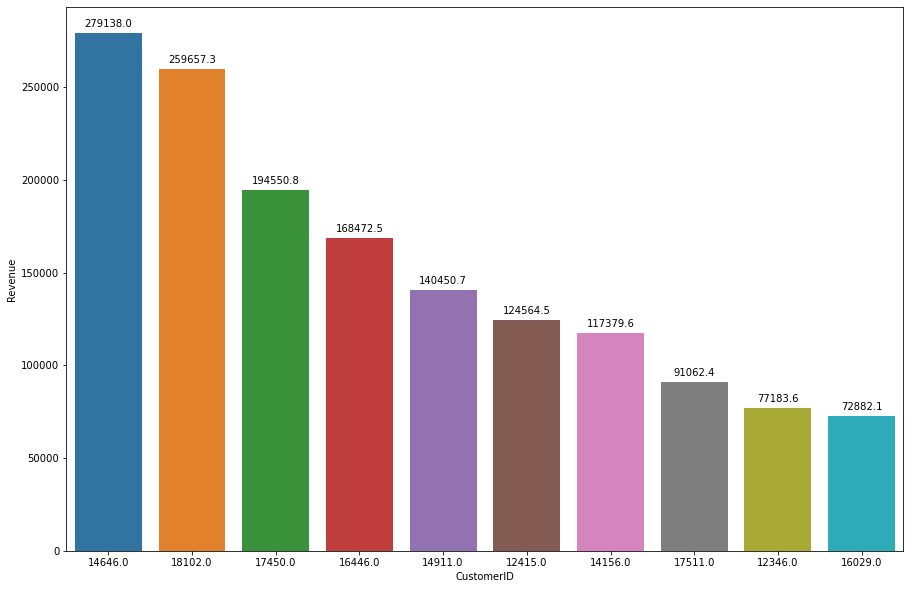

In [21]:
plt.figure(figsize=(15,10))
rev = sns.barplot(x='CustomerID',y='Revenue',data=rv,order=rv.sort_values('Revenue',ascending=False).CustomerID)

for p in rev.patches:
    rev.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

#### Inference:

* Above graph depicts the Top 10 cutomers generating the highest Revenue.
* 14646 and 18102 being the Top 2 cutomers.

### No.Of Visits by Customers

In [22]:
# New Attribute : Frequency

products = df.groupby('CustomerID')['InvoiceNo'].nunique()
products= products.reset_index()
products.columns = ['CustomerID', 'Total_Transactions']
products

,CustomerID,Total_Transactions
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4329,18280.0,1
4330,18281.0,1
4331,18282.0,2
4332,18283.0,16


In [23]:
total_t = products.sort_values('Total_Transactions',ascending=False)
total_t.head(10)

,CustomerID,Total_Transactions
326,12748.0,206
1879,14911.0,199
4007,17841.0,124
562,13089.0,97
2176,15311.0,91
1661,14606.0,90
481,12971.0,86
1689,14646.0,72
795,13408.0,62
2700,16029.0,62


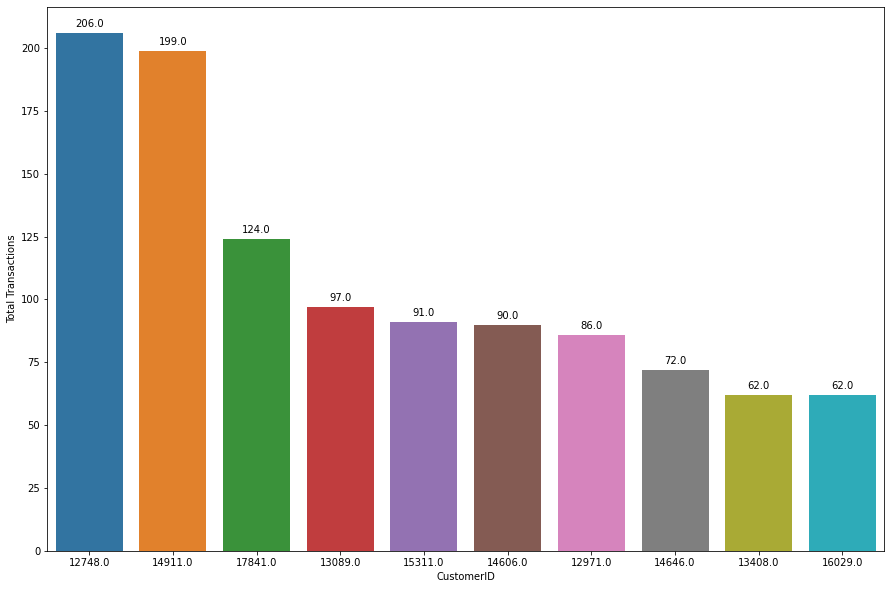

In [24]:
plt.figure(figsize=(15,10))
tt = sns.barplot(x='CustomerID', y='Total_Transactions', data=total_t.head(10),order=total_t.head(10).sort_values('Total_Transactions',ascending=False).CustomerID)
plt.ylabel('Total Transactions')

for p in tt.patches:
    tt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

#### Inferences:

* Analysed customer wise unique invoices as Total_transactions
* Fetched Top 10 customers with highest frequencies.
* customer 12748 with 206 tops the list.

### Month Wise Frequency of visits

In [25]:
df['Invoice_Month'] = df['InvoiceDate'].dt.strftime('%B')
df['Invoice_Year'] = df['InvoiceDate'].dt.year

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Invoice_Month,Invoice_Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,December,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,December,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,December,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,December,2010


In [27]:
# Monthly Frequency - For the year 2010

monthly_frequency_2010 = df[df['Invoice_Year']==2010].groupby('Invoice_Month')['InvoiceNo'].count()
monthly_frequency_2010 = monthly_frequency_2010.reset_index()
monthly_frequency_2010.columns = ['Month', 'Frequency']
monthly_frequency_2010

,Month,Frequency
0,December,26065


In [28]:
# Monthly Frequency - For the year 2011

monthly_frequency_2011 = df[df['Invoice_Year']==2011].groupby('Invoice_Month')['InvoiceNo'].count()
monthly_frequency_2011 = monthly_frequency_2011.reset_index()
monthly_frequency_2011.columns = ['Month', 'Frequency']
monthly_frequency_2011

,Month,Frequency
0,April,22563
1,August,26907
2,December,17245
3,February,19855
4,January,21141
5,July,26730
6,June,27090
7,March,27069
8,May,28216
9,November,64323


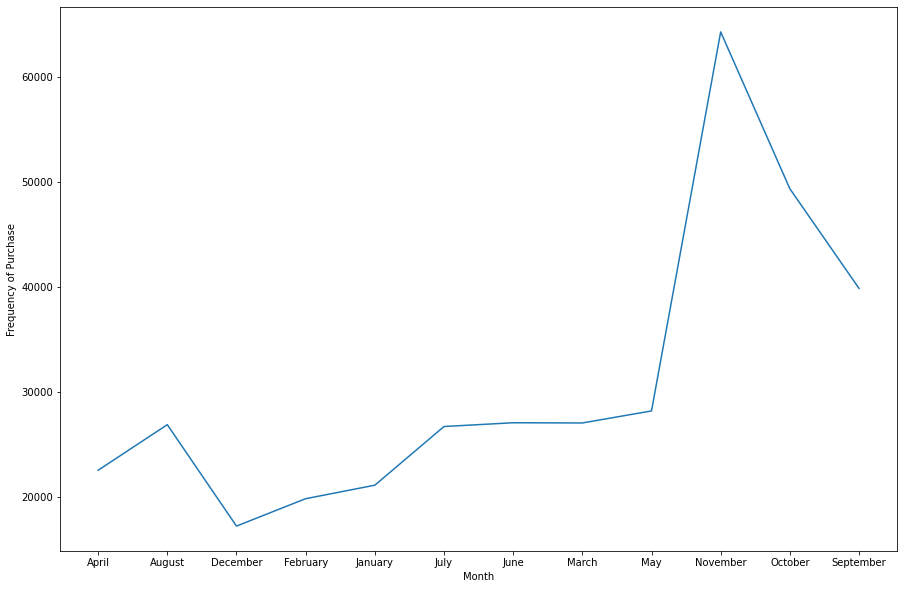

In [29]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Month', y='Frequency',data=monthly_frequency_2011)
plt.ylabel('Frequency of Purchase')
plt.show()

#### Inference:

* The high peak in the month of November indicates more purchases.
* The dataset belongs to online gift store and we know that many events such as Christmas,Thanks giving day were lined up during that time.

### Total Purchased Quantity by Each Customer

In [30]:
total_quantity = df.groupby('CustomerID')[['Quantity']].sum().reset_index()
total_q=total_quantity.sort_values(by = 'Quantity',ascending=False)
total_q

,CustomerID,Quantity
1689,14646.0,196844
3006,16446.0,80997
1879,14911.0,80263
55,12415.0,77373
0,12346.0,74215
...,...,...
824,13452.0,2
2321,15510.0,2
3012,16454.0,2
3483,17102.0,2


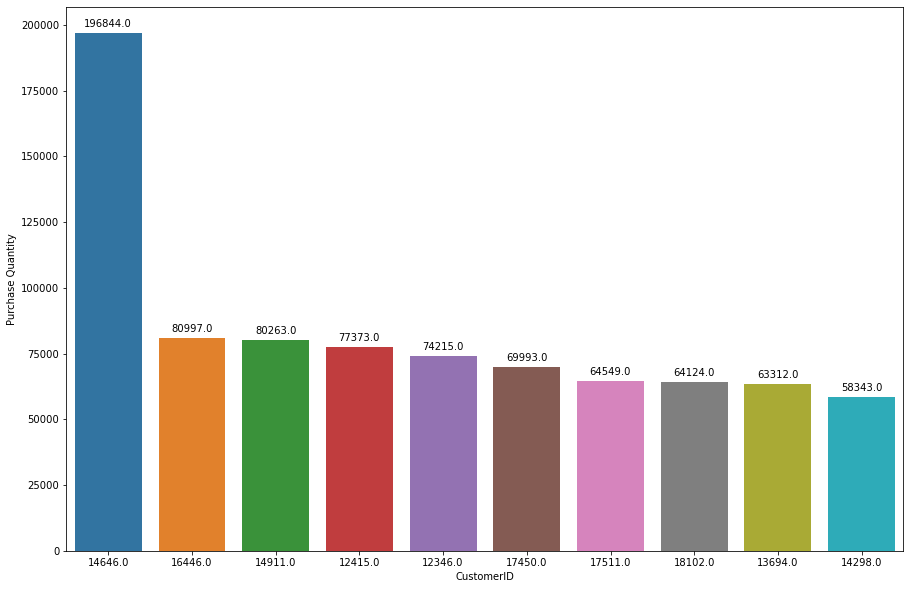

In [31]:
plt.figure(figsize=(15,10))
quan = sns.barplot(x = 'CustomerID',y='Quantity',data=total_q.head(10),order=total_q.head(10).sort_values('Quantity',ascending=False).CustomerID)
plt.ylabel('Purchase Quantity')

for p in quan.patches:
    quan.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

#### Inference:

* Above graph depicts top 10 customers with highest purchased quantity.
* Customer 14646 with 196844 being the highest purchased customer in terms of quantity.
* This customer might be wholesaler due to huge purchase history.

### Customer Retention

Trying to find out the loyal customers based on their purchases with respect to Invoice date.

In [32]:
uniquedates = df.groupby('CustomerID')['InvoiceDate'].nunique()
uniquedates= uniquedates.reset_index()
uniquedates.columns = ['CustomerID', 'Retention']
uniquedates

,CustomerID,Retention
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4329,18280.0,1
4330,18281.0,1
4331,18282.0,2
4332,18283.0,14


In [33]:
ret = uniquedates.sort_values('Retention',ascending=False)
ret.head(10)

,CustomerID,Retention
1879,14911.0,131
326,12748.0,113
4007,17841.0,112
2176,15311.0,90
1661,14606.0,88
481,12971.0,71
562,13089.0,66
1602,14527.0,54
1069,13798.0,53
2988,16422.0,48


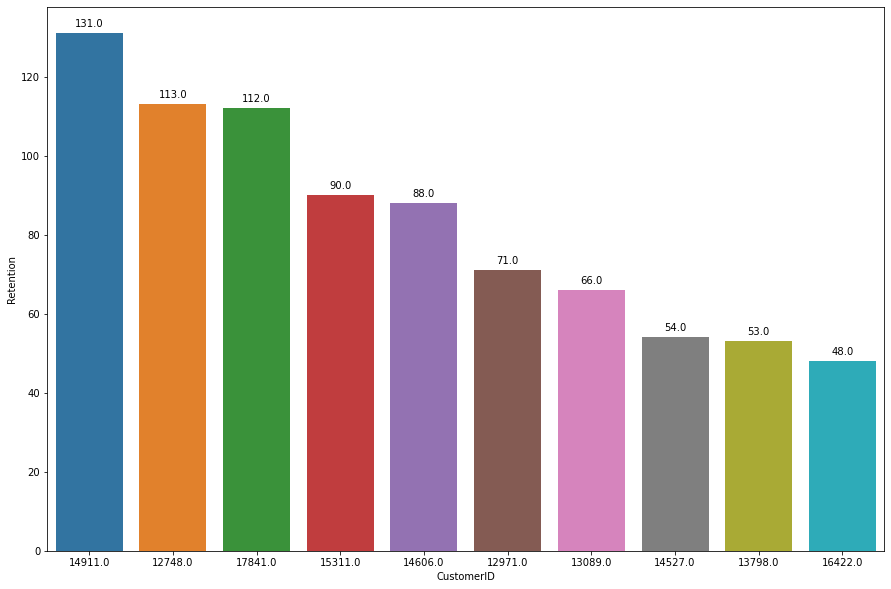

In [34]:
plt.figure(figsize=(15,10))
ret_p = sns.barplot(x='CustomerID', y='Retention', data=ret.head(10),order=ret.head(10).sort_values('Retention',ascending=False).CustomerID)


for p in ret_p.patches:
    ret_p.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

#### Inference

* Calculating Customer retention is an importatant aspect for any retail store which says his frequency of visiting the store for purchase
* Calculated Customer retention with respect to days in an year
* Above graph depicts the top 10 customer with high  retention
* Customer 14911 has the highest retention with 131 days which says that the customer is visiting  the store every three days once.

## Creating a Dataset out of Extracted Features

In [35]:
merge_1 = pd.merge(revenue,products,on='CustomerID',how='inner')
merge_1

,CustomerID,Revenue,Total_Transactions
0,12346.0,77183.60,1
1,12347.0,4310.00,7
2,12348.0,1437.24,4
3,12349.0,1457.55,1
4,12350.0,294.40,1
...,...,...,...
4329,18280.0,180.60,1
4330,18281.0,80.82,1
4331,18282.0,178.05,2
4332,18283.0,2088.93,16


In [36]:
merge_2 = pd.merge(total_quantity,uniquedates,on='CustomerID',how='inner')
merge_2

,CustomerID,Quantity,Retention
0,12346.0,74215,1
1,12347.0,2458,7
2,12348.0,2332,4
3,12349.0,630,1
4,12350.0,196,1
...,...,...,...
4329,18280.0,45,1
4330,18281.0,54,1
4331,18282.0,103,2
4332,18283.0,1395,14


In [37]:
final_df = pd.merge(merge_1,merge_2,on='CustomerID',how='inner')
final_df

,CustomerID,Revenue,Total_Transactions,Quantity,Retention
0,12346.0,77183.60,1,74215,1
1,12347.0,4310.00,7,2458,7
2,12348.0,1437.24,4,2332,4
3,12349.0,1457.55,1,630,1
4,12350.0,294.40,1,196,1
...,...,...,...,...,...
4329,18280.0,180.60,1,45,1
4330,18281.0,80.82,1,54,1
4331,18282.0,178.05,2,103,2
4332,18283.0,2088.93,16,1395,14


In [38]:
final_df.shape

(4334, 5)

In [39]:
final_df.describe()

,CustomerID,Revenue,Total_Transactions,Quantity,Retention
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,15299.251731,2023.016302,4.247116,1190.007153,3.848408
std,1721.994109,8924.198162,7.643124,5043.301380,5.931010
min,12346.000000,3.750000,1.000000,1.000000,1.000000
25%,13812.250000,305.867500,1.000000,160.000000,1.000000
50%,15297.500000,668.125000,2.000000,379.000000,2.000000
75%,16778.750000,1631.622500,5.000000,991.750000,4.000000
max,18287.000000,279138.020000,206.000000,196844.000000,131.000000


In [40]:
final_df.drop('CustomerID',1).corr()

,Revenue,Total_Transactions,Quantity,Retention
Revenue,1.000000,0.550672,0.923565,0.491057
Total_Transactions,0.550672,1.000000,0.557049,0.969709
Quantity,0.923565,0.557049,1.000000,0.505253
Retention,0.491057,0.969709,0.505253,1.000000


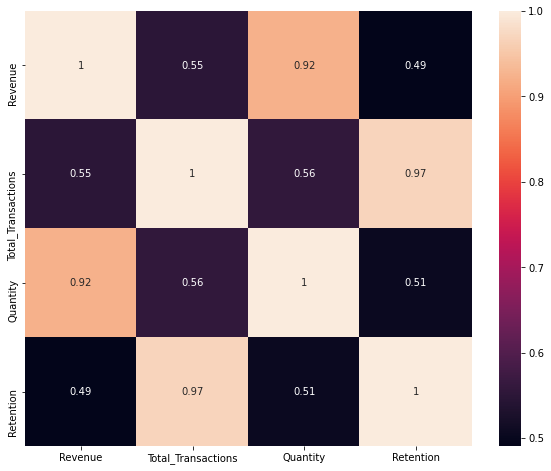

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(final_df.drop('CustomerID',1).corr(),annot=True)
plt.show()

#### Inference:

* Retention is highly correlated with Total_transactions
* Revenue is highly correlated with Quantity
* The more Quantity customer purchases the more Revenue store generates.

# Scaling the data

In [42]:
X = final_df.drop('CustomerID',1)

In [43]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
df_scaled

,Revenue,Total_Transactions,Quantity,Retention
0,8.423082,-0.424890,14.481272,-0.480312
1,0.256297,0.360219,0.251450,0.531437
2,-0.065647,-0.032336,0.226464,0.025562
3,-0.063371,-0.424890,-0.111053,-0.480312
4,-0.193722,-0.424890,-0.197117,-0.480312
...,...,...,...,...
4329,-0.206476,-0.424890,-0.227061,-0.480312
4330,-0.217658,-0.424890,-0.225277,-0.480312
4331,-0.206761,-0.294039,-0.215560,-0.311687
4332,0.007387,1.537884,0.040651,1.711810


# CLUSTERING

## K-MEANS

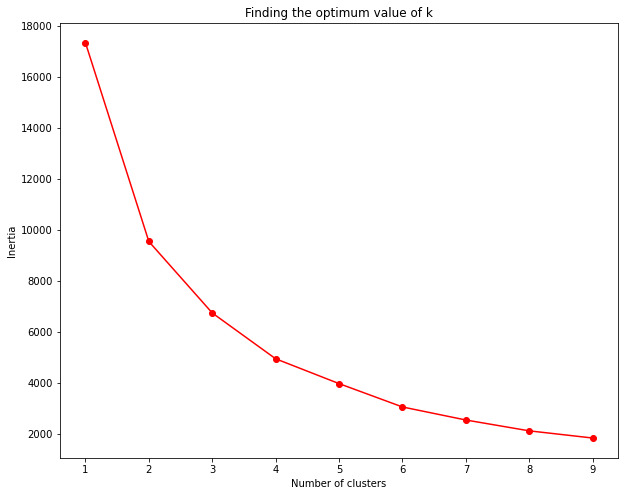

In [44]:
# Calculating inertia:
err = []

for k in range (1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_scaled)
    err.append(kmeans.inertia_)
    
# Visualization of k values:
# Elbow plot:

plt.figure(figsize=(10,8))
plt.plot(range(1,10), err, color='red',marker = 'o')
plt.title('Finding the optimum value of k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
err

[17336.00000000003,
 9541.839974118851,
 6739.921213737825,
 4943.2944247680625,
 3970.41406553406,
 3054.543567689601,
 2543.27244982029,
 2118.2726404895393,
 1836.8521569239556]

In [46]:
# Calculating silhouette score

for clusters in range(2,10):
    model =  KMeans(clusters)
    model.fit(df_scaled)
    sil_score = silhouette_score(df_scaled, model.labels_)
    print('silhouette_score for ', clusters, 'clusters : ', sil_score)

silhouette_score for  2 clusters :  0.9489153196524313
silhouette_score for  3 clusters :  0.7924515599470331
silhouette_score for  4 clusters :  0.7836427258803584
silhouette_score for  5 clusters :  0.7573824294771075
silhouette_score for  6 clusters :  0.671120783326512
silhouette_score for  7 clusters :  0.666594399927782
silhouette_score for  8 clusters :  0.6651381512109412
silhouette_score for  9 clusters :  0.5972698596511147


#### Inference:

* There is significant drop when k = 3.
* Evaluating the same with Sllhoutte score.
* Concluding K clusters to be 3.

### Modeling

#### KMeans with 3 clusters

In [47]:
kmean = KMeans(n_clusters=3)
k_model = kmean.fit(df_scaled)

print('Model Labels')
print('------------------')
print(k_model.labels_)
print('\n')
print('Cluster Centers')
print('------------------')
print(k_model.cluster_centers_)
print('\n')
print('Model Inertia')
print('------------------')
print(k_model.inertia_)

Model Labels
------------------
[1 2 2 ... 2 0 2]


Cluster Centers
------------------
[[ 0.8038934   1.94696792  0.79958106  2.17745143]
 [12.30800949  8.58847933 12.55109266  7.41529653]
 [-0.10871671 -0.17383185 -0.1094368  -0.18517701]]


Model Inertia
------------------
6739.94088889186


In [48]:
df_kmeans_3 = df_scaled.copy()

df_kmeans_3['labels']=k_model.labels_

df_kmeans_3

,Revenue,Total_Transactions,Quantity,Retention,labels
0,8.423082,-0.424890,14.481272,-0.480312,1
1,0.256297,0.360219,0.251450,0.531437,2
2,-0.065647,-0.032336,0.226464,0.025562,2
3,-0.063371,-0.424890,-0.111053,-0.480312,2
4,-0.193722,-0.424890,-0.197117,-0.480312,2
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.227061,-0.480312,2
4330,-0.217658,-0.424890,-0.225277,-0.480312,2
4331,-0.206761,-0.294039,-0.215560,-0.311687,2
4332,0.007387,1.537884,0.040651,1.711810,0


In [49]:
df_kmeans_3['labels'].value_counts()

2    4032
0     285
1      17
Name: labels, dtype: int64

In [50]:
df_kmeans_3[df_kmeans_3['labels']==0]

,Revenue,Total_Transactions,Quantity,Retention,labels
39,0.073921,1.014478,0.179862,1.205936,0
69,0.488552,1.407033,0.338903,1.711810,0
75,0.271697,1.799588,0.337911,1.880435,0
100,1.725960,2.977253,1.371084,2.554934,0
103,0.529271,1.799588,0.718262,2.217685,0
...,...,...,...,...,...
4289,0.390680,1.014478,0.407318,1.374561,0
4290,0.359181,0.883626,0.451342,1.205936,0
4293,0.588791,2.061291,0.257399,2.723559,0
4303,0.005612,1.668736,-0.027566,2.217685,0


In [51]:
df_kmeans_3[df_kmeans_3['labels']==1]

,Revenue,Total_Transactions,Quantity,Retention,labels
0,8.423082,-0.424890,14.481272,-0.480312,1
55,13.732960,2.061291,15.107521,1.880435,1
326,3.395016,26.399699,4.822991,18.405667,1
562,6.365767,12.136868,5.925373,10.480300,1
996,7.062133,5.986841,12.319145,5.252931,1
1333,12.927764,6.641099,11.242940,6.601930,1
1434,5.547837,5.201731,11.333764,3.566683,1
1689,31.055673,8.865577,38.799301,6.939179,1
1879,15.513290,25.483737,15.680625,21.440913,1
2176,6.583411,11.351758,7.338103,14.527296,1


In [52]:
df_kmeans_3[df_kmeans_3['labels']==2]

,Revenue,Total_Transactions,Quantity,Retention,labels
1,0.256297,0.360219,0.251450,0.531437,2
2,-0.065647,-0.032336,0.226464,0.025562,2
3,-0.063371,-0.424890,-0.111053,-0.480312,2
4,-0.193722,-0.424890,-0.197117,-0.480312,2
5,-0.071418,0.360219,-0.131676,0.531437,2
...,...,...,...,...,...
4328,-0.207226,-0.424890,-0.222897,-0.480312,2
4329,-0.206476,-0.424890,-0.227061,-0.480312,2
4330,-0.217658,-0.424890,-0.225277,-0.480312,2
4331,-0.206761,-0.294039,-0.215560,-0.311687,2


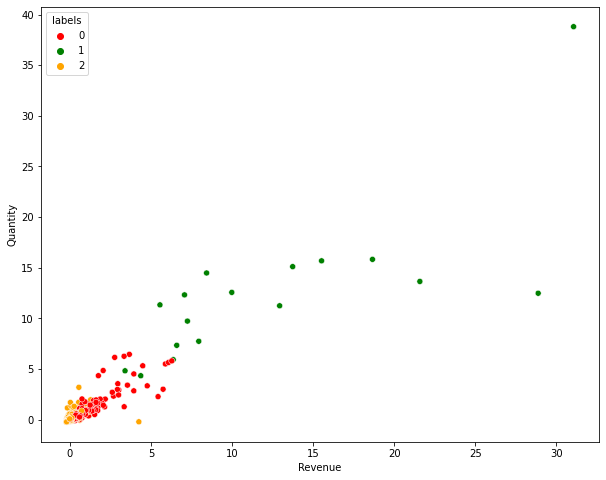

In [53]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Revenue',y='Quantity',hue='labels',data=df_kmeans_3,palette=['red','green','orange'])
plt.show()

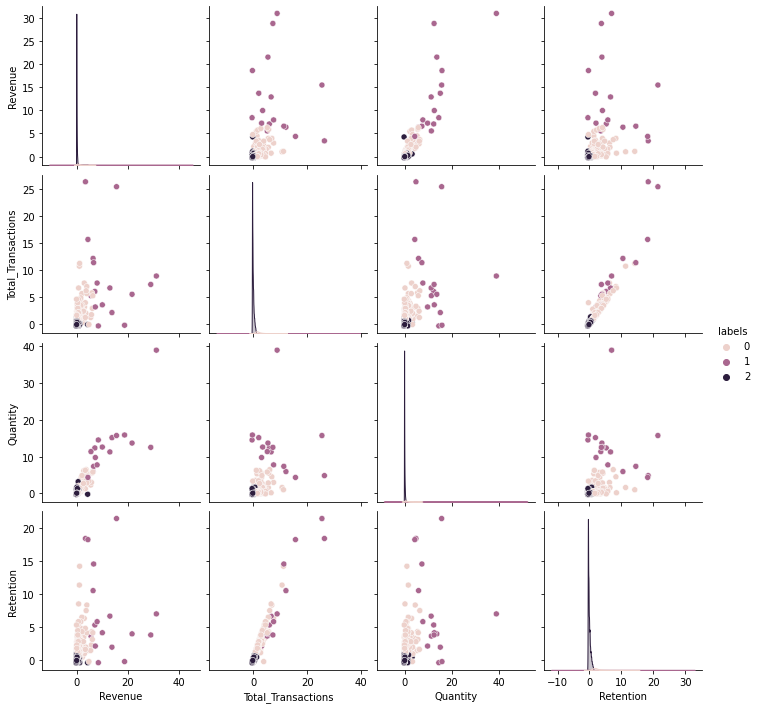

In [54]:
sns.pairplot(df_kmeans_3,hue='labels',diag_kind='kde')
plt.show()

#### Agglomerative

In [55]:
# Calculating Cophenetic score

link=['single','complete','average','ward']
for l in link:
    Z = linkage(df_scaled, method = l)
    c, coph_dist = cophenet(Z, pdist(df_scaled))
    print('Cophenetic value for ', l , 'is: ', c)

Cophenetic value for  single is:  0.9099362060522479
Cophenetic value for  complete is:  0.9309028911141762
Cophenetic value for  average is:  0.9697359723231431
Cophenetic value for  ward is:  0.49516970328210286


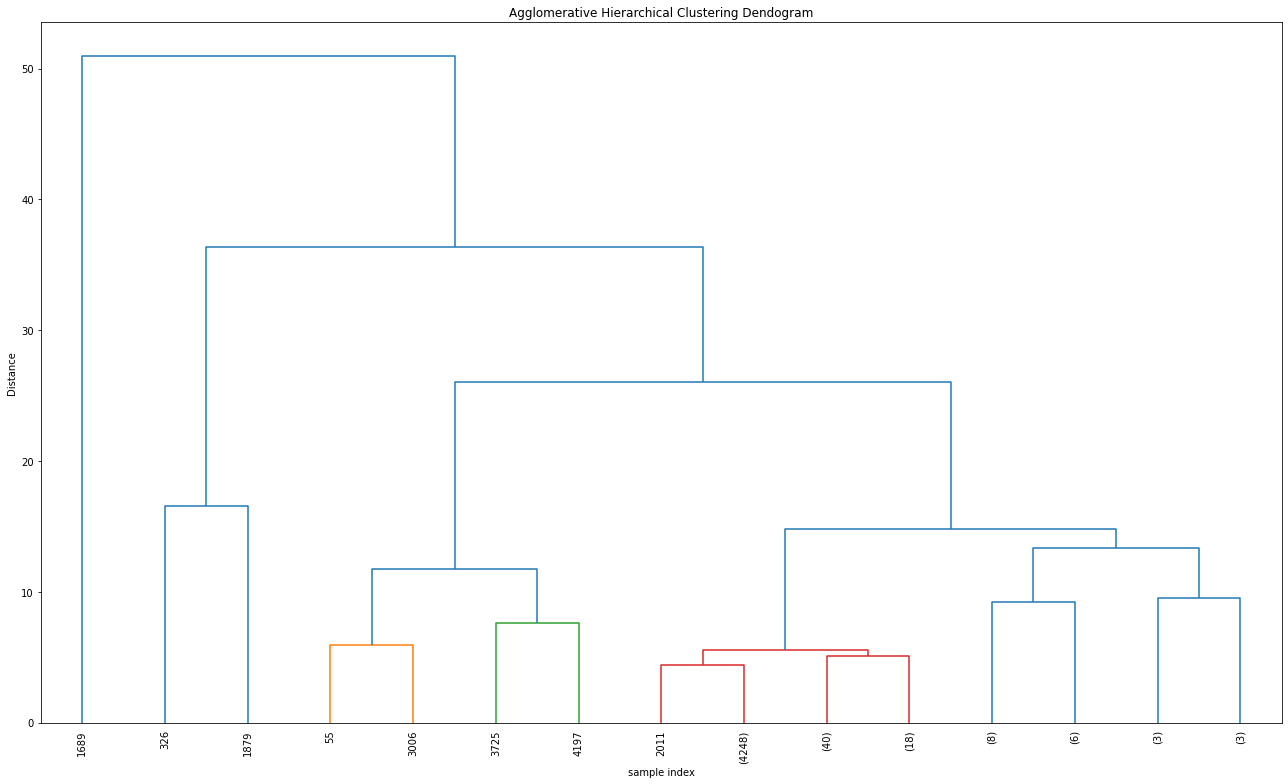

In [56]:
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'average')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

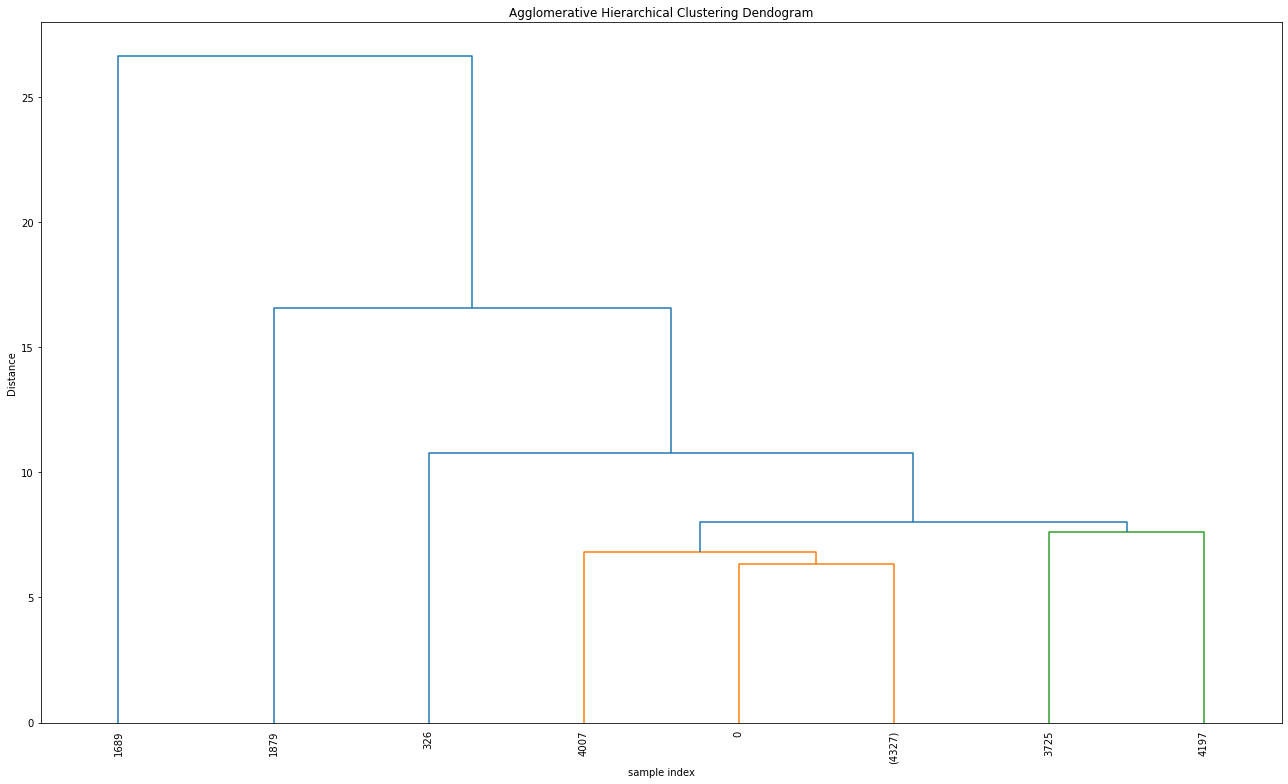

In [57]:
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'single')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

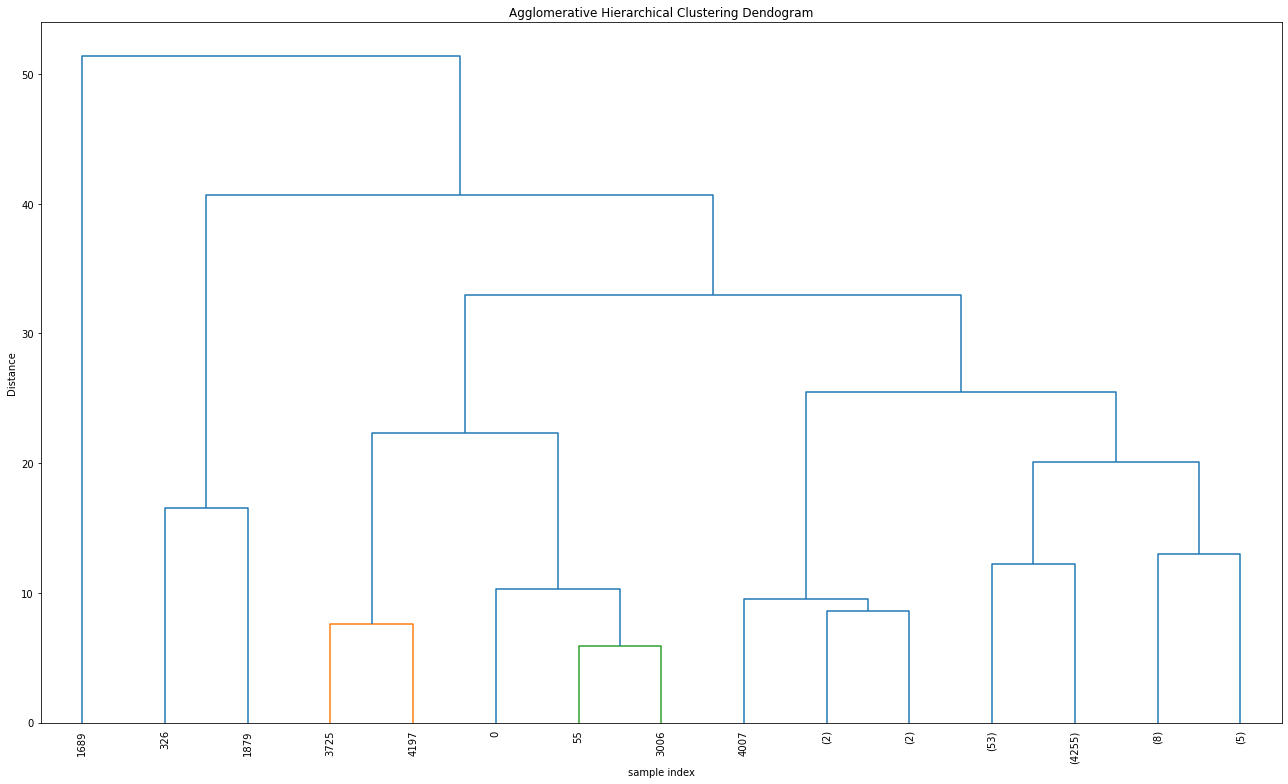

In [58]:
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'complete')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

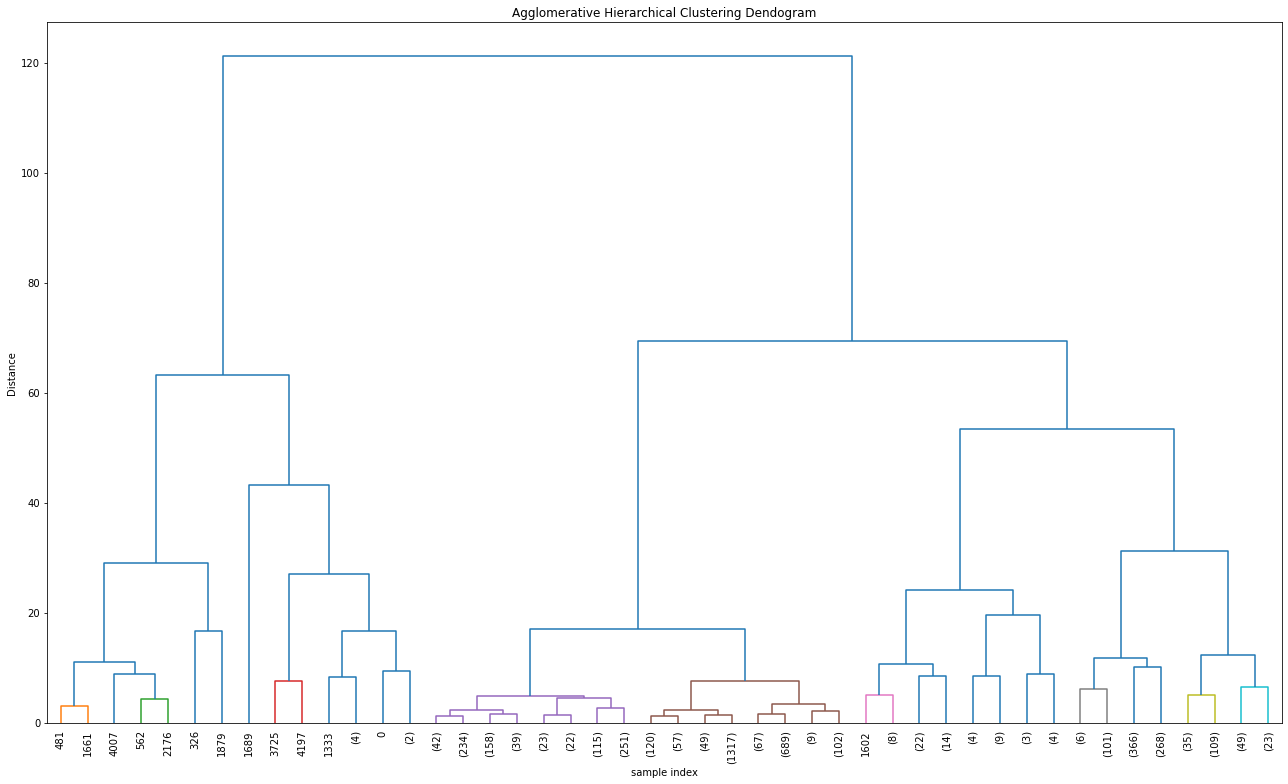

In [59]:
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

In [60]:
#silhouette score

c = [2,3,4,5]
link=['single','complete','average','ward']
score= []
for i in c:
    for l in link:
        cluster=AgglomerativeClustering(n_clusters=i,linkage=l)
        cluster.fit(df_scaled)
        label = cluster.labels_
        score = silhouette_score(df_scaled,label,random_state=10)
        print('The score of', i ,'clusters and',l,'linkage is ',score)
    
    print('\n')

The score of 2 clusters and single linkage is  0.9772567220526529
The score of 2 clusters and complete linkage is  0.9772567220526529
The score of 2 clusters and average linkage is  0.9772567220526529
The score of 2 clusters and ward linkage is  0.9552638748945556


The score of 3 clusters and single linkage is  0.9707669698722907
The score of 3 clusters and complete linkage is  0.9685526055828385
The score of 3 clusters and average linkage is  0.9685526055828385
The score of 3 clusters and ward linkage is  0.6367973326463835


The score of 4 clusters and single linkage is  0.9649282356442936
The score of 4 clusters and complete linkage is  0.9554876939131143
The score of 4 clusters and average linkage is  0.9582345257931185
The score of 4 clusters and ward linkage is  0.6377598500666418


The score of 5 clusters and single linkage is  0.9616976587679904
The score of 5 clusters and complete linkage is  0.9455007291729324
The score of 5 clusters and average linkage is  0.957812527750329

#### Agglomerative with 2 clusters

In [61]:
agg = AgglomerativeClustering(n_clusters=3 , linkage='ward')
model_agg=agg.fit(df_scaled)

print('\n')
print('Model Labels')
print('------------------')
print(model_agg.labels_)



Model Labels
------------------
[0 1 2 ... 2 1 2]


In [62]:
df_agg_2 = df_scaled.copy()
df_agg_2['labels']= model_agg.labels_
df_agg_2

,Revenue,Total_Transactions,Quantity,Retention,labels
0,8.423082,-0.424890,14.481272,-0.480312,0
1,0.256297,0.360219,0.251450,0.531437,1
2,-0.065647,-0.032336,0.226464,0.025562,2
3,-0.063371,-0.424890,-0.111053,-0.480312,2
4,-0.193722,-0.424890,-0.197117,-0.480312,2
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.227061,-0.480312,2
4330,-0.217658,-0.424890,-0.225277,-0.480312,2
4331,-0.206761,-0.294039,-0.215560,-0.311687,2
4332,0.007387,1.537884,0.040651,1.711810,1


In [63]:
df_agg_2['labels'].value_counts()

2    3294
1    1022
0      18
Name: labels, dtype: int64

## Comparing Kmeans and Agglomerative

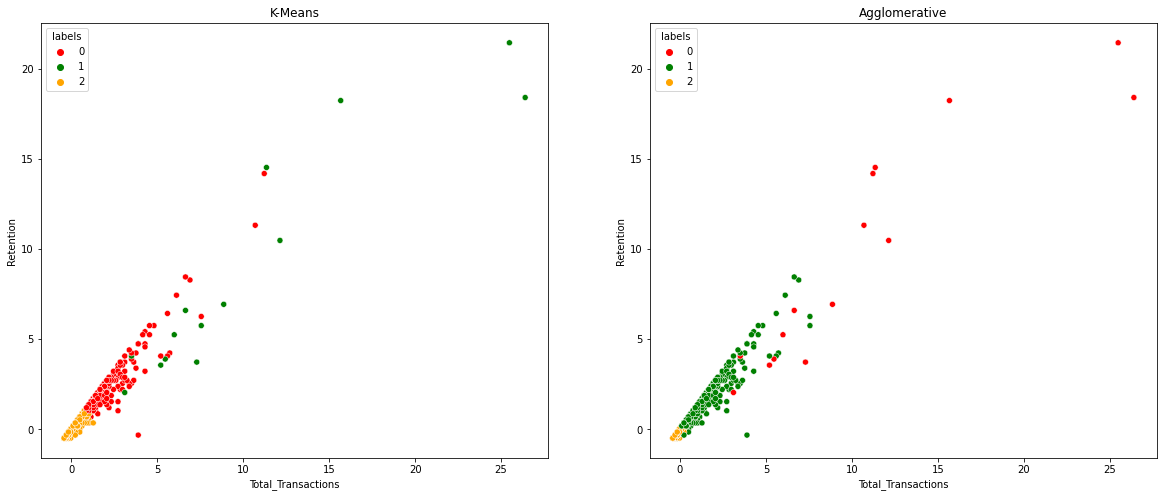

In [64]:
plt.figure(figsize=(20,8))

ax1=plt.subplot(1,2,1)
plt.title('K-Means')
sns.scatterplot(x='Total_Transactions',y='Retention', hue='labels', data=df_kmeans_3,palette=['red','green','orange'],ax=ax1)

ax2=plt.subplot(1,2,2)
plt.title('Agglomerative')
sns.scatterplot(x='Total_Transactions',y='Retention', hue='labels', data=df_agg_2,palette=['red','green','orange'],ax=ax2)

plt.show()

## OBSERVATIONS:

#### Kmeans

    Class 0 = 4035
    Class 2 = 282
    Class 1 = 17

    model_inertia = 6739.94088889186
    silhouette score = 0.79172

#### AggAgglomerative

    Class 0 = 18
    Class 2 = 3294
    Class 1 = 1022
    
    silhouette score = 0.63679

Inference: K-Means is a better model than AGC.But the cluster sizes vary a lot. This brings about the need to search for subclusters.

As noticed above class 1 has very less data compared to other classes, we need to reconsider for clustering of class 0 and class 2.

In [65]:
df_kmeans_3[df_kmeans_3['labels']==1]

,Revenue,Total_Transactions,Quantity,Retention,labels
0,8.423082,-0.424890,14.481272,-0.480312,1
55,13.732960,2.061291,15.107521,1.880435,1
326,3.395016,26.399699,4.822991,18.405667,1
562,6.365767,12.136868,5.925373,10.480300,1
996,7.062133,5.986841,12.319145,5.252931,1
1333,12.927764,6.641099,11.242940,6.601930,1
1434,5.547837,5.201731,11.333764,3.566683,1
1689,31.055673,8.865577,38.799301,6.939179,1
1879,15.513290,25.483737,15.680625,21.440913,1
2176,6.583411,11.351758,7.338103,14.527296,1


-- Will be dropping the data belonging to class 1 and consider only class 0 and class 2 data.

In [108]:
final_df['labels']=df_kmeans_3['labels']
final_df

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
0,12346.0,77183.60,1,74215,1,1
1,12347.0,4310.00,7,2458,7,2
2,12348.0,1437.24,4,2332,4,2
3,12349.0,1457.55,1,630,1,2
4,12350.0,294.40,1,196,1,2
...,...,...,...,...,...,...
4329,18280.0,180.60,1,45,1,2
4330,18281.0,80.82,1,54,1,2
4331,18282.0,178.05,2,103,2,2
4332,18283.0,2088.93,16,1395,14,0


In [118]:
final_subcluster_high = final_df[final_df['labels']==1]
final_subcluster_high

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
0,12346.0,77183.60,1,74215,1,1
55,12415.0,124564.53,20,77373,15,1
326,12748.0,32317.32,206,25511,113,1
562,13089.0,58825.83,97,31070,66,1
996,13694.0,65039.62,50,63312,35,1
1333,14156.0,117379.63,55,57885,43,1
1434,14298.0,51527.30,44,58343,25,1
1689,14646.0,279138.02,72,196844,45,1
1879,14911.0,140450.72,199,80263,131,1
2176,15311.0,60767.90,91,38194,90,1


In [110]:
final_subcluster_data = final_df[final_df['labels']!=1]
final_subcluster_data

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
1,12347.0,4310.00,7,2458,7,2
2,12348.0,1437.24,4,2332,4,2
3,12349.0,1457.55,1,630,1,2
4,12350.0,294.40,1,196,1,2
5,12352.0,1385.74,7,526,7,2
...,...,...,...,...,...,...
4329,18280.0,180.60,1,45,1,2
4330,18281.0,80.82,1,54,1,2
4331,18282.0,178.05,2,103,2,2
4332,18283.0,2088.93,16,1395,14,0


In [112]:
final_subcluster_data=final_subcluster_data.drop('labels',1)
final_subcluster_data

,CustomerID,Revenue,Total_Transactions,Quantity,Retention
1,12347.0,4310.00,7,2458,7
2,12348.0,1437.24,4,2332,4
3,12349.0,1457.55,1,630,1
4,12350.0,294.40,1,196,1
5,12352.0,1385.74,7,526,7
...,...,...,...,...,...
4329,18280.0,180.60,1,45,1
4330,18281.0,80.82,1,54,1
4331,18282.0,178.05,2,103,2
4332,18283.0,2088.93,16,1395,14


In [111]:
sub_cluster_data = df_kmeans_3[df_kmeans_3['labels']!=1]
sub_cluster_data

,Revenue,Total_Transactions,Quantity,Retention,labels
1,0.256297,0.360219,0.251450,0.531437,2
2,-0.065647,-0.032336,0.226464,0.025562,2
3,-0.063371,-0.424890,-0.111053,-0.480312,2
4,-0.193722,-0.424890,-0.197117,-0.480312,2
5,-0.071418,0.360219,-0.131676,0.531437,2
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.227061,-0.480312,2
4330,-0.217658,-0.424890,-0.225277,-0.480312,2
4331,-0.206761,-0.294039,-0.215560,-0.311687,2
4332,0.007387,1.537884,0.040651,1.711810,0


In [67]:
sub_cluster_data=sub_cluster_data.drop('labels',1)
sub_cluster_data

,Revenue,Total_Transactions,Quantity,Retention
1,0.256297,0.360219,0.251450,0.531437
2,-0.065647,-0.032336,0.226464,0.025562
3,-0.063371,-0.424890,-0.111053,-0.480312
4,-0.193722,-0.424890,-0.197117,-0.480312
5,-0.071418,0.360219,-0.131676,0.531437
...,...,...,...,...
4329,-0.206476,-0.424890,-0.227061,-0.480312
4330,-0.217658,-0.424890,-0.225277,-0.480312
4331,-0.206761,-0.294039,-0.215560,-0.311687
4332,0.007387,1.537884,0.040651,1.711810


# CLUSTERING

## KMeans

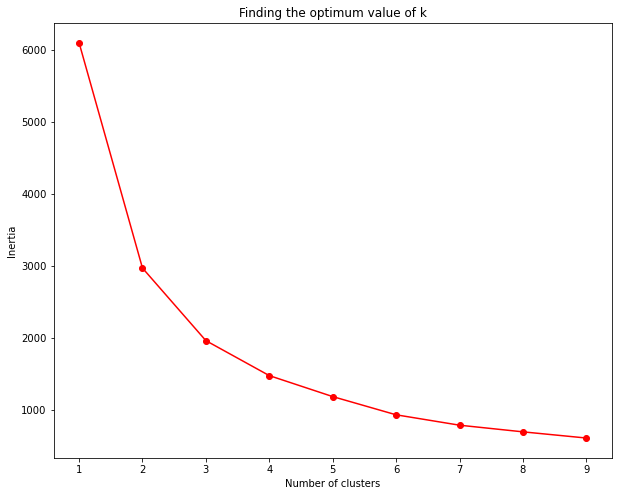

In [68]:
# Calculating inertia:
err = []

for k in range (1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(sub_cluster_data)
    err.append(kmeans.inertia_)
    
# Visualization of k values:
# Elbow plot:

plt.figure(figsize=(10,8))
plt.plot(range(1,10), err, color='red',marker = 'o')
plt.title('Finding the optimum value of k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [69]:
err

[6094.686897033286,
 2969.929782215572,
 1963.4051844074854,
 1478.6438703538117,
 1187.7280102028424,
 935.149593301559,
 791.1027542738635,
 698.8275700541108,
 613.0830779835529]

In [70]:
# Calculating silhouette score

for clusters in range(2,10):
    model =  KMeans(clusters)
    model.fit(sub_cluster_data)
    sil_score = silhouette_score(sub_cluster_data, model.labels_)
    print('silhouette_score for ', clusters, 'clusters : ', sil_score)

silhouette_score for  2 clusters :  0.7950313348987061
silhouette_score for  3 clusters :  0.6978028038761432
silhouette_score for  4 clusters :  0.6375219827302522
silhouette_score for  5 clusters :  0.6380597054166527
silhouette_score for  6 clusters :  0.5949184592190084
silhouette_score for  7 clusters :  0.5590425905142723
silhouette_score for  8 clusters :  0.5591485093620939
silhouette_score for  9 clusters :  0.5524738982161915


Inference:
    
    -- Choosing the optimal k as 4 based on silhouette score and Elbow plot

In [83]:
kmean = KMeans(n_clusters=4)
k_model = kmean.fit(sub_cluster_data)

print('Model Labels')
print('------------------')
print(k_model.labels_)
print('\n')
print('Cluster Centers')
print('------------------')
print(k_model.cluster_centers_)
print('\n')
print('Model Inertia')
print('------------------')
print(k_model.inertia_)

Model Labels
------------------
[2 1 1 ... 1 0 1]


Cluster Centers
------------------
[[ 0.78217406  1.85679055  0.76772337  2.06933174]
 [-0.15150175 -0.29837911 -0.15537899 -0.33121187]
 [ 0.09123733  0.4050169   0.1022464   0.49414077]
 [ 2.26299789  5.05218589  2.326521    5.48780158]]


Model Inertia
------------------
1473.3808702985743


In [84]:
sub_Cluster_Kmeans = sub_cluster_data.copy()

sub_Cluster_Kmeans['labels']=k_model.labels_

sub_Cluster_Kmeans

,Revenue,Total_Transactions,Quantity,Retention,labels
1,0.256297,0.360219,0.251450,0.531437,2
2,-0.065647,-0.032336,0.226464,0.025562,1
3,-0.063371,-0.424890,-0.111053,-0.480312,1
4,-0.193722,-0.424890,-0.197117,-0.480312,1
5,-0.071418,0.360219,-0.131676,0.531437,2
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.227061,-0.480312,1
4330,-0.217658,-0.424890,-0.225277,-0.480312,1
4331,-0.206761,-0.294039,-0.215560,-0.311687,1
4332,0.007387,1.537884,0.040651,1.711810,0


In [85]:
sub_Cluster_Kmeans['labels'].value_counts()

1    3256
2     850
0     183
3      28
Name: labels, dtype: int64

## Agglomerative

In [86]:
# Calculating Cophenetic score

link=['single','complete','average','ward']
for l in link:
    Z = linkage(sub_cluster_data, method = l)
    c, coph_dist = cophenet(Z, pdist(sub_cluster_data))
    print('Cophenetic value for ', l , 'is: ', c)

Cophenetic value for  single is:  0.8164536556246292
Cophenetic value for  complete is:  0.8923945252548677
Cophenetic value for  average is:  0.9392314854243193
Cophenetic value for  ward is:  0.5602432071976025


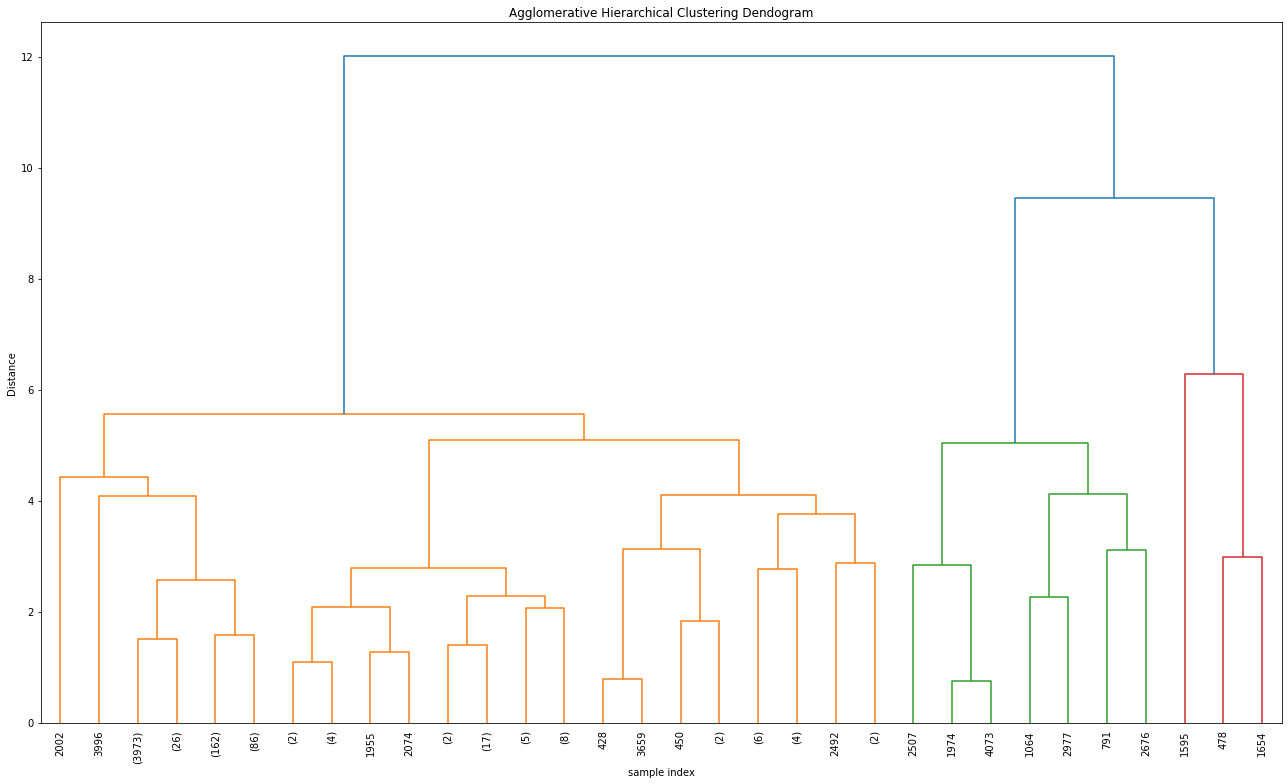

In [87]:
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(sub_cluster_data, 'average')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

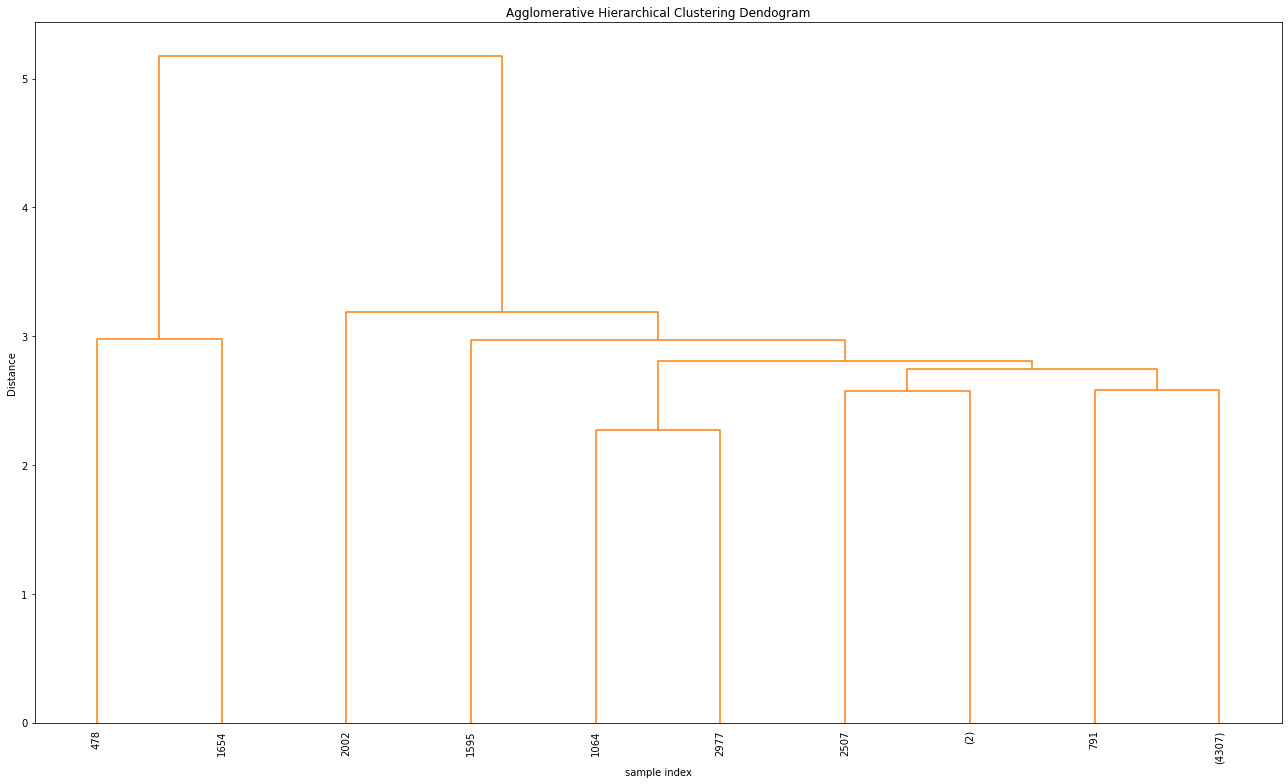

In [88]:
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(sub_cluster_data, 'single')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

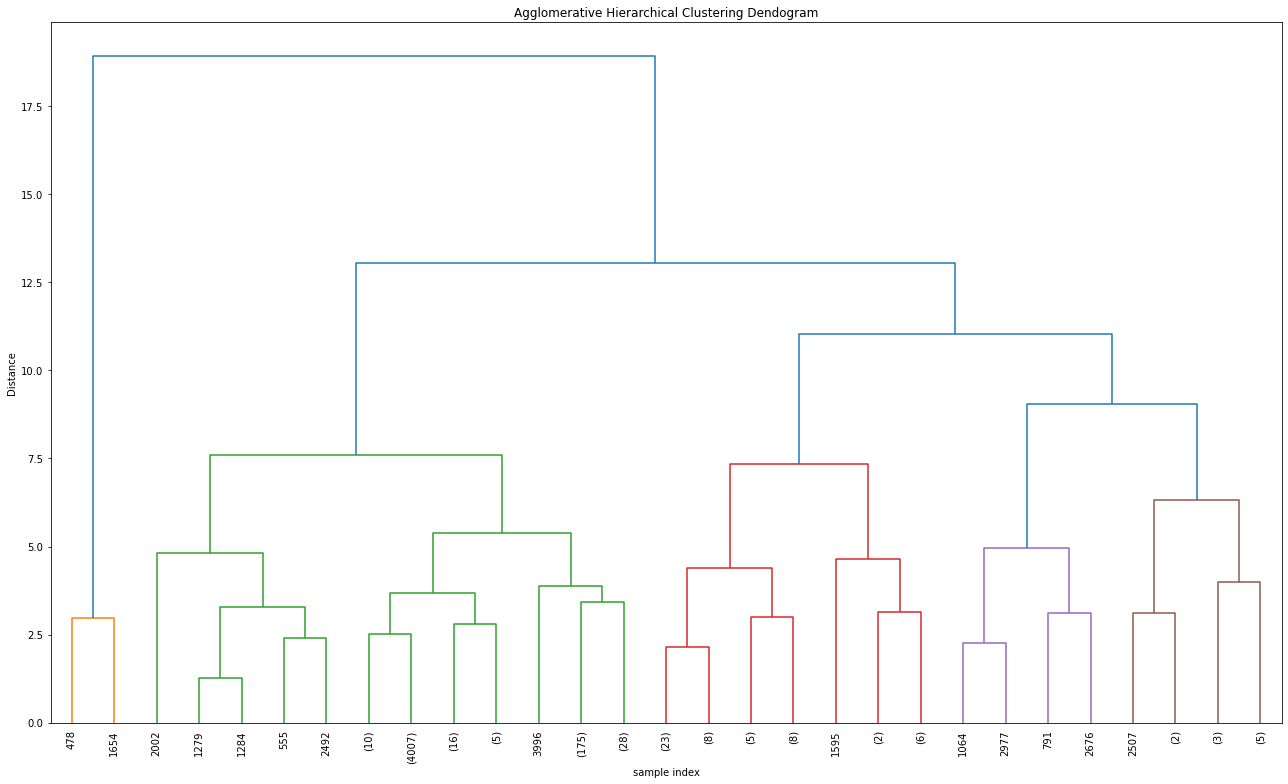

In [89]:
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(sub_cluster_data, 'complete')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

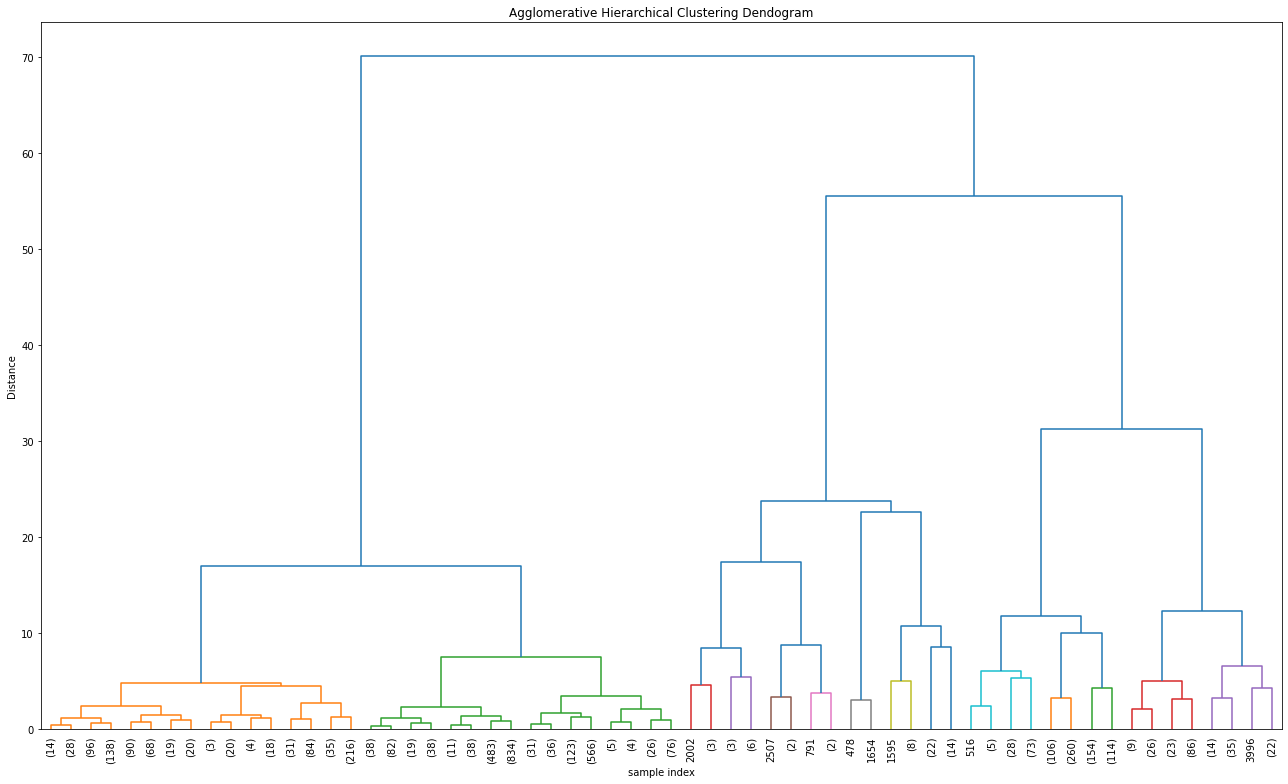

In [90]:
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(sub_cluster_data, 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

In [95]:
#silhouette score

c = [2,3,4,5]
link=['single','complete','average','ward']
score= []
for i in c:
    for l in link:
        cluster=AgglomerativeClustering(n_clusters=i,linkage=l)
        cluster.fit(sub_cluster_data)
        label = cluster.labels_
        score = silhouette_score(sub_cluster_data,label,random_state=10)
        print('The score of', i ,'clusters and',l,'linkage is ',score)
    
    print('\n')

The score of 2 clusters and single linkage is  0.941458281810275
The score of 2 clusters and complete linkage is  0.941458281810275
The score of 2 clusters and average linkage is  0.9185263897965105
The score of 2 clusters and ward linkage is  0.6381711025430807


The score of 3 clusters and single linkage is  0.7979653432173138
The score of 3 clusters and complete linkage is  0.8514655121489949
The score of 3 clusters and average linkage is  0.9084149235163654
The score of 3 clusters and ward linkage is  0.6500839652308529


The score of 4 clusters and single linkage is  0.7974407432078306
The score of 4 clusters and complete linkage is  0.8306362159668169
The score of 4 clusters and average linkage is  0.9062260837795785
The score of 4 clusters and ward linkage is  0.6238481641794977


The score of 5 clusters and single linkage is  0.7963539168263692
The score of 5 clusters and complete linkage is  0.8304910628794869
The score of 5 clusters and average linkage is  0.8377389945397433


Inference:
    
    -- Choosing the optimal k value as 3 and linkgae method as ward.

In [91]:
agg = AgglomerativeClustering(n_clusters=3 , linkage='ward')
model_agg=agg.fit(sub_cluster_data)

print('\n')
print('Model Labels')
print('------------------')
print(model_agg.labels_)



Model Labels
------------------
[0 1 1 ... 1 0 1]


In [92]:
sub_cluster_agg = sub_cluster_data.copy()
sub_cluster_agg['labels']= model_agg.labels_
sub_cluster_agg

,Revenue,Total_Transactions,Quantity,Retention,labels
1,0.256297,0.360219,0.251450,0.531437,0
2,-0.065647,-0.032336,0.226464,0.025562,1
3,-0.063371,-0.424890,-0.111053,-0.480312,1
4,-0.193722,-0.424890,-0.197117,-0.480312,1
5,-0.071418,0.360219,-0.131676,0.531437,0
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.227061,-0.480312,1
4330,-0.217658,-0.424890,-0.225277,-0.480312,1
4331,-0.206761,-0.294039,-0.215560,-0.311687,1
4332,0.007387,1.537884,0.040651,1.711810,0


In [93]:
sub_cluster_agg['labels'].value_counts()

1    3294
0     957
2      66
Name: labels, dtype: int64

## Comparing KMeans and Agglomerative

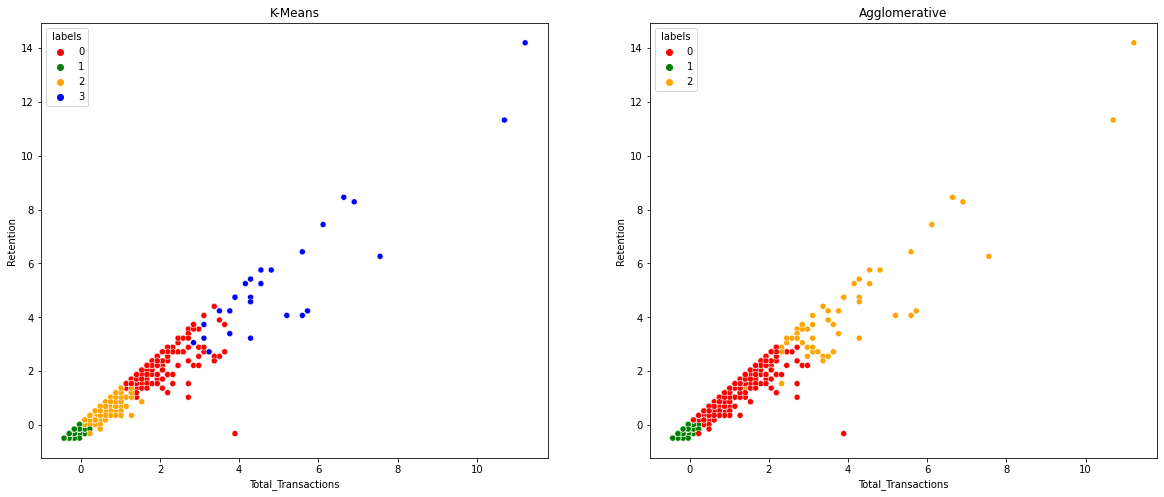

In [94]:
plt.figure(figsize=(20,8))

ax1=plt.subplot(1,2,1)
plt.title('K-Means')
sns.scatterplot(x='Total_Transactions',y='Retention', hue='labels', data=sub_Cluster_Kmeans,palette=['red','green','orange','blue'],ax=ax1)

ax2=plt.subplot(1,2,2)
plt.title('Agglomerative')
sns.scatterplot(x='Total_Transactions',y='Retention', hue='labels', data=sub_cluster_agg,palette=['red','green','orange'],ax=ax2)

plt.show()

Inference 

-- Kmeans is a better model with 4 clusters.

In [105]:
sub_Cluster_Kmeans

,Revenue,Total_Transactions,Quantity,Retention,labels
1,0.256297,0.360219,0.251450,0.531437,2
2,-0.065647,-0.032336,0.226464,0.025562,1
3,-0.063371,-0.424890,-0.111053,-0.480312,1
4,-0.193722,-0.424890,-0.197117,-0.480312,1
5,-0.071418,0.360219,-0.131676,0.531437,2
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.227061,-0.480312,1
4330,-0.217658,-0.424890,-0.225277,-0.480312,1
4331,-0.206761,-0.294039,-0.215560,-0.311687,1
4332,0.007387,1.537884,0.040651,1.711810,0


In [113]:
final_subcluster_data['labels']=sub_Cluster_Kmeans['labels']
final_subcluster_data

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
1,12347.0,4310.00,7,2458,7,2
2,12348.0,1437.24,4,2332,4,1
3,12349.0,1457.55,1,630,1,1
4,12350.0,294.40,1,196,1,1
5,12352.0,1385.74,7,526,7,2
...,...,...,...,...,...,...
4329,18280.0,180.60,1,45,1,1
4330,18281.0,80.82,1,54,1,1
4331,18282.0,178.05,2,103,2,1
4332,18283.0,2088.93,16,1395,14,0


In [119]:
final_subcluster_high = final_subcluster_high.replace({'labels':{1:4}})
final_subcluster_high

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
0,12346.0,77183.60,1,74215,1,4
55,12415.0,124564.53,20,77373,15,4
326,12748.0,32317.32,206,25511,113,4
562,13089.0,58825.83,97,31070,66,4
996,13694.0,65039.62,50,63312,35,4
1333,14156.0,117379.63,55,57885,43,4
1434,14298.0,51527.30,44,58343,25,4
1689,14646.0,279138.02,72,196844,45,4
1879,14911.0,140450.72,199,80263,131,4
2176,15311.0,60767.90,91,38194,90,4


In [121]:
Result_data = pd.concat([final_subcluster_data,final_subcluster_high],axis=0)
Result_data

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
1,12347.0,4310.00,7,2458,7,2
2,12348.0,1437.24,4,2332,4,1
3,12349.0,1457.55,1,630,1,1
4,12350.0,294.40,1,196,1,1
5,12352.0,1385.74,7,526,7,2
...,...,...,...,...,...,...
3174,16684.0,66653.56,28,50255,16,4
3725,17450.0,194550.79,46,69993,27,4
3768,17511.0,91062.38,31,64549,28,4
4007,17841.0,40967.72,124,23053,112,4


In [122]:
Result_data.labels.value_counts()

1    3256
2     850
0     183
3      28
4      17
Name: labels, dtype: int64

In [123]:
df1 = Result_data[Result_data['labels']==0]
df2 = Result_data[Result_data['labels']==1]
df3 = Result_data[Result_data['labels']==2]
df4 = Result_data[Result_data['labels']==3]
df5 = Result_data[Result_data['labels']==4]

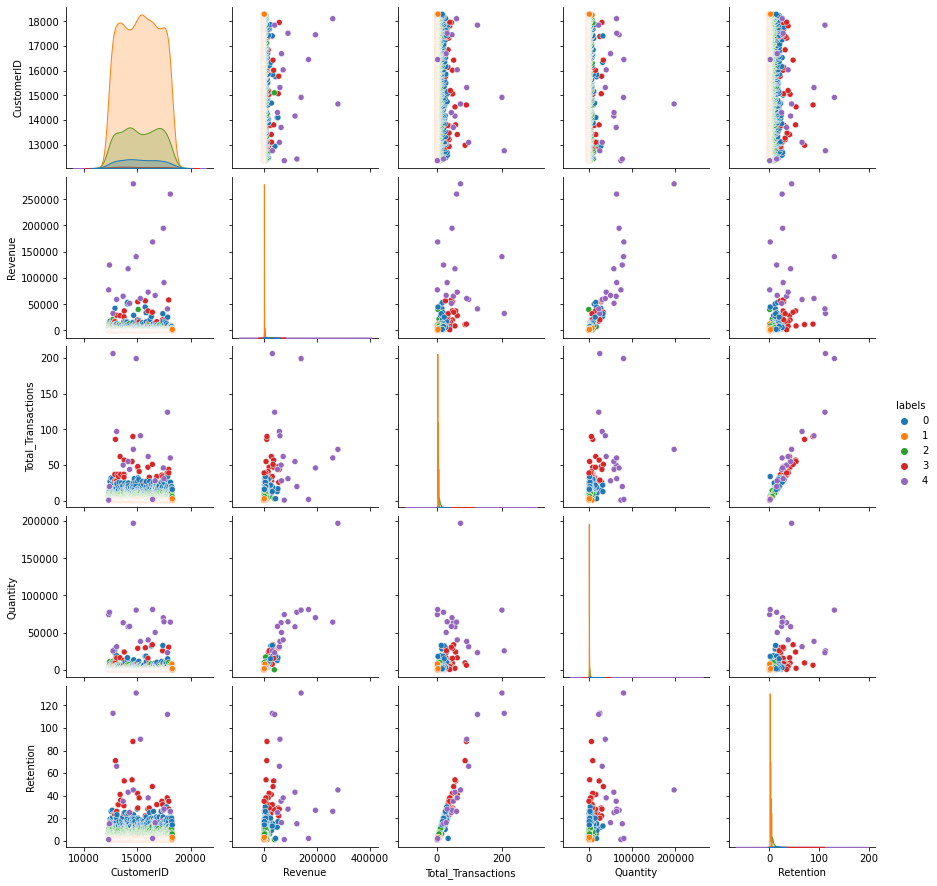

In [125]:
sns.pairplot(Result_data,hue='labels',diag_kind='kde',palette='tab10')
plt.show()

In [128]:
df1.describe()

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
count,183.00000,183.000000,183.000000,183.000000,183.000000,183.0
mean,15271.26776,9002.487268,18.437158,5061.420765,16.120219,0.0
std,1715.21187,7970.779882,5.112486,4672.788723,4.331938,0.0
min,12431.00000,2004.980000,3.000000,675.000000,2.000000,0.0
25%,13977.00000,4710.560000,15.000000,2622.500000,13.000000,0.0
50%,15187.00000,6675.710000,17.000000,3850.000000,15.000000,0.0
75%,16717.50000,10007.695000,21.000000,5662.000000,18.000000,0.0
max,18283.00000,53258.430000,34.000000,32744.000000,30.000000,0.0


In [129]:
df2.describe()

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.0
mean,15304.815418,671.140695,1.966830,406.474509,1.884214,1.0
std,1716.028425,724.599633,1.101377,480.596920,1.018922,0.0
min,12348.000000,3.750000,1.000000,1.000000,1.000000,1.0
25%,13812.750000,234.535000,1.000000,127.000000,1.000000,1.0
50%,15323.500000,444.710000,2.000000,258.000000,2.000000,1.0
75%,16768.250000,842.537500,3.000000,511.250000,3.000000,1.0
max,18287.000000,12393.700000,6.000000,7824.000000,4.000000,1.0


In [130]:
df3.describe()

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.0
mean,15290.010588,2837.142341,7.342353,1705.607059,6.778824,2.0
std,1742.184954,2374.291450,2.289263,1429.439540,2.068446,0.0
min,12347.000000,70.020000,3.000000,20.000000,1.000000,2.0
25%,13817.250000,1562.870000,6.000000,842.000000,5.000000,2.0
50%,15246.000000,2307.290000,7.000000,1390.500000,6.000000,2.0
75%,16840.000000,3448.067500,9.000000,2089.500000,8.000000,2.0
max,18272.000000,39916.500000,16.000000,17280.000000,13.000000,2.0


In [132]:
df4.describe()

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.0
mean,15201.785714,22216.127857,42.857143,12922.000000,36.392857,3.0
std,1814.629895,15452.019990,15.671901,9772.276341,15.093141,0.0
min,12901.000000,1296.440000,26.000000,560.000000,20.000000,3.0
25%,13453.000000,10842.962500,33.750000,6168.500000,28.000000,3.0
50%,15050.000000,17437.450000,37.000000,9092.000000,32.000000,3.0
75%,16958.000000,29620.250000,47.250000,17942.750000,38.750000,3.0
max,17961.000000,58030.480000,90.000000,33704.000000,88.000000,3.0


In [133]:
df5.describe()

,CustomerID,Revenue,Total_Transactions,Quantity,Retention,labels
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,15157.470588,111849.459412,69.882353,64481.647059,47.823529,4.0
std,1955.049076,74449.594440,59.391584,38930.770707,40.227844,0.0
min,12346.000000,32317.320000,1.000000,23053.000000,1.000000,4.0
25%,13694.000000,60767.900000,31.000000,40207.000000,25.000000,4.0
50%,14911.000000,77183.600000,55.000000,63312.000000,35.000000,4.0
75%,16684.000000,140450.720000,91.000000,74215.000000,66.000000,4.0
max,18102.000000,279138.020000,206.000000,196844.000000,131.000000,4.0


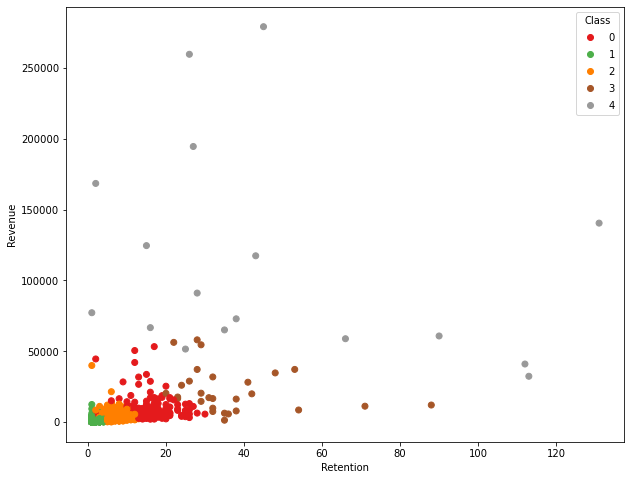

In [135]:
plt.figure(figsize=(10,8))
scatter3 = plt.scatter(Result_data['Retention'],Result_data['Revenue'], c=Result_data.labels, cmap=plt.cm.Set1)
plt.xlabel('Retention')
plt.ylabel('Revenue')
plt.legend(*scatter3.legend_elements(),
                    loc="upper right", title="Class")
plt.show()

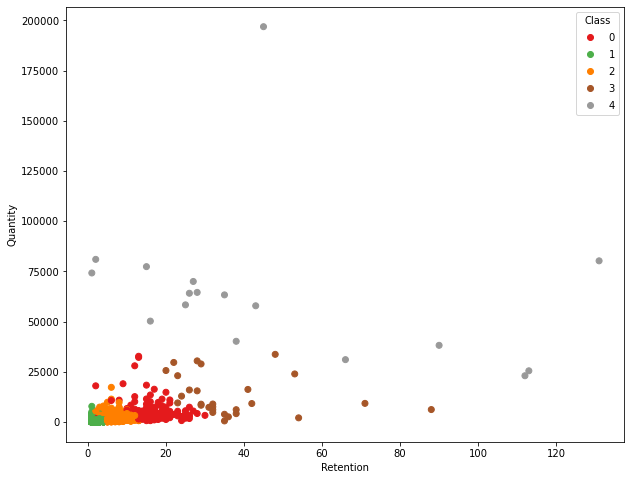

In [137]:
plt.figure(figsize=(10,8))
scatter3 = plt.scatter(Result_data['Retention'],Result_data['Quantity'], c=Result_data.labels, cmap=plt.cm.Set1)
plt.xlabel('Retention')
plt.ylabel('Quantity')
plt.legend(*scatter3.legend_elements(),
                    loc="upper right", title="Class")
plt.show()

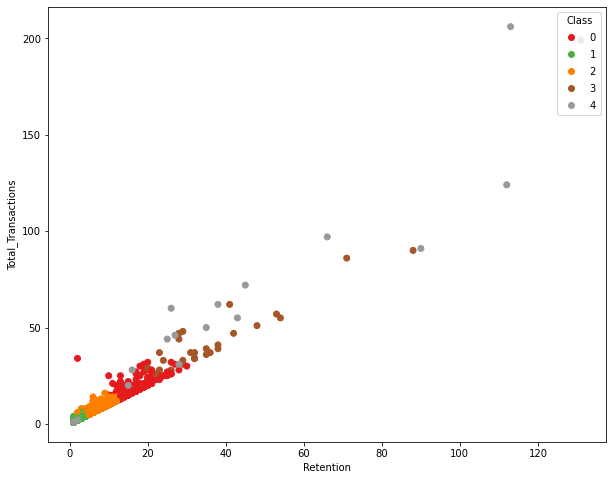

In [138]:
plt.figure(figsize=(10,8))
scatter3 = plt.scatter(Result_data['Retention'],Result_data['Total_Transactions'], c=Result_data.labels, cmap=plt.cm.Set1)
plt.xlabel('Retention')
plt.ylabel('Total_Transactions')
plt.legend(*scatter3.legend_elements(),
                    loc="upper right", title="Class")
plt.show()

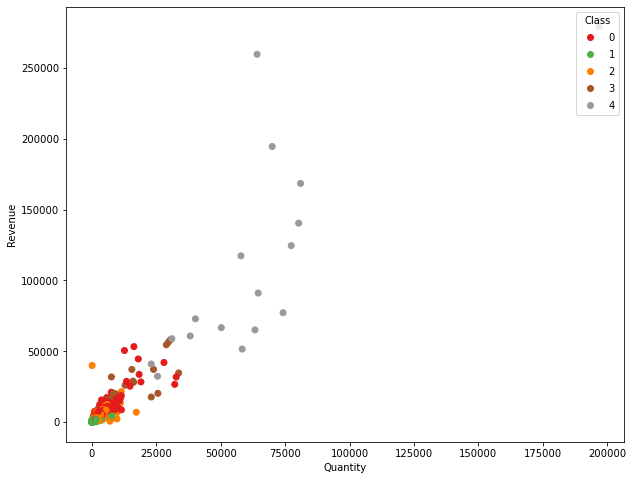

In [136]:
plt.figure(figsize=(10,8))
scatter3 = plt.scatter(Result_data['Quantity'],Result_data['Revenue'], c=Result_data.labels, cmap=plt.cm.Set1)
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(*scatter3.legend_elements(),
                    loc="upper right", title="Class")
plt.show()

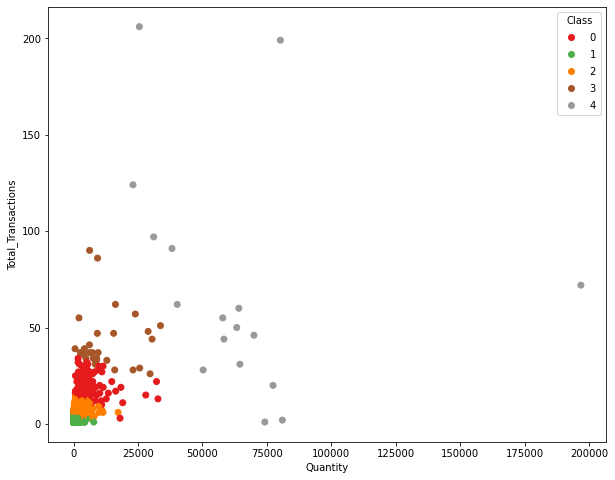

In [139]:
plt.figure(figsize=(10,8))
scatter3 = plt.scatter(Result_data['Quantity'],Result_data['Total_Transactions'], c=Result_data.labels, cmap=plt.cm.Set1)
plt.xlabel('Quantity')
plt.ylabel('Total_Transactions')
plt.legend(*scatter3.legend_elements(),
                    loc="upper right", title="Class")
plt.show()

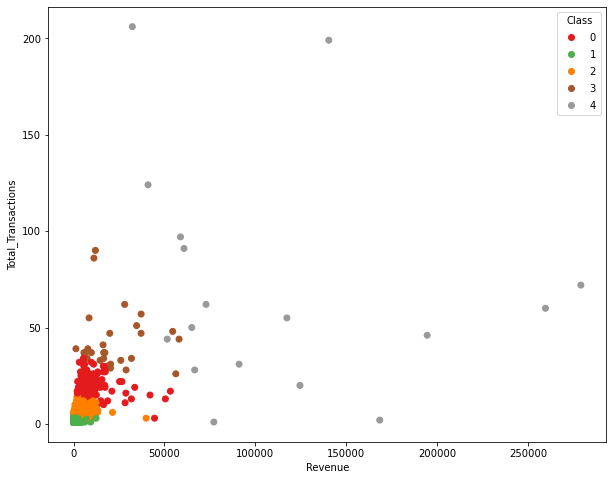

In [140]:
plt.figure(figsize=(10,8))
scatter3 = plt.scatter(Result_data['Revenue'],Result_data['Total_Transactions'], c=Result_data.labels, cmap=plt.cm.Set1)
plt.xlabel('Revenue')
plt.ylabel('Total_Transactions')
plt.legend(*scatter3.legend_elements(),
                    loc="upper right", title="Class")
plt.show()

# SUMMARY

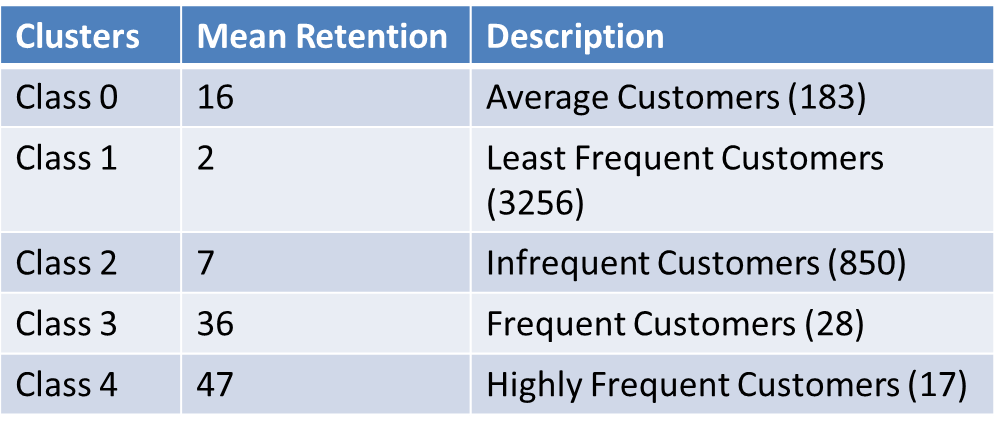

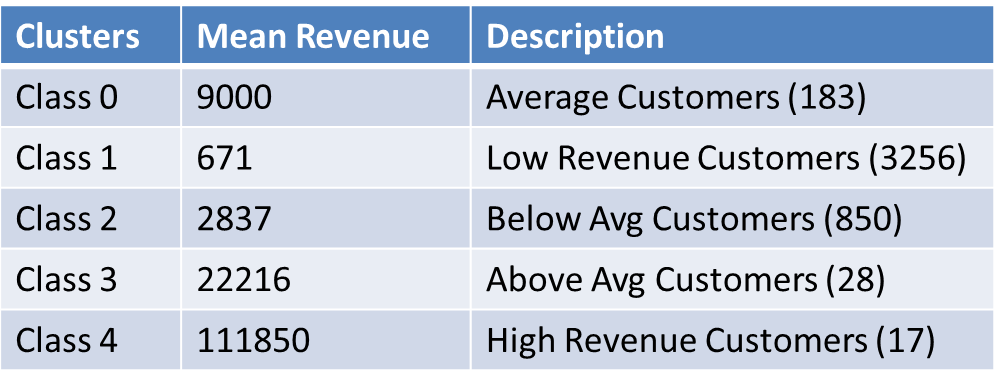